In [2]:

#import the Parser, different classifiers implemented for TP2

from Classifier import ConLLUParser
from differentClassifiers import NaiveClassifier, RandomClassifier, StratifiedClassifier, MostCommonPOSClassifier, WordDistributedRandomClassifier

verbose = False
fr_train = ConLLUParser('fr_gsd-ud-train.conllu', verbose)
fr_dev = ConLLUParser('fr_gsd-ud-dev.conllu', verbose)
fr_test = ConLLUParser('fr_gsd-ud-test.conllu', verbose)

#Estonian 
verbose = False
et_train = ConLLUParser('et_edt-ud-train.conllu', verbose)
et_dev = ConLLUParser('et_edt-ud-dev.conllu', verbose)
et_test = ConLLUParser('et_edt-ud-test.conllu', verbose)
#Finnish 
verbose = False
fi_train = ConLLUParser('fi_ftb-ud-train.conllu', verbose)
fi_dev = ConLLUParser('fi_ftb-ud-dev.conllu', verbose)
fi_test=ConLLUParser('fi_ftb-ud-test.conllu', verbose)
#English 
verbose = False
en_train = ConLLUParser('en_ewt-ud-train.conllu', verbose)
en_dev = ConLLUParser('en_ewt-ud-dev.conllu', verbose)
en_test = ConLLUParser('en_ewt-ud-test.conllu', verbose)


             sent_id                                               text  \
0  fr-ud-train_00001  Les commotions cérébrales sont devenu si coura...   
1  fr-ud-train_00002  L'œuvre est située dans la galerie des bataill...   
2  fr-ud-train_00003  Le comportement de la Turquie vis-à-vis du pro...   
3  fr-ud-train_00004        Toutefois, les filles adorent les desserts.   
4  fr-ud-train_00005  Ismene entre et annonce que c'est Farnace qui ...   

   length  
0      19  
1      17  
2      34  
3       8  
4      18  


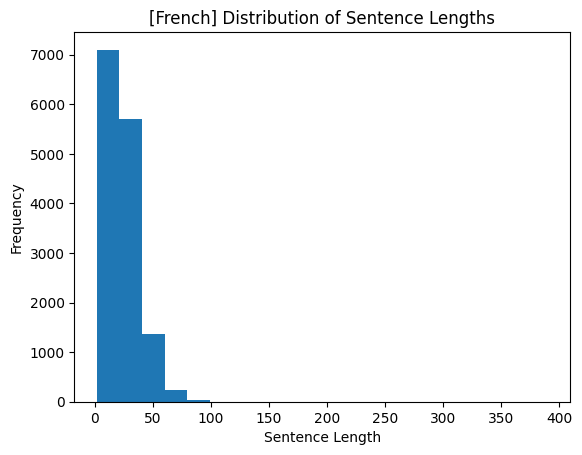

In [2]:
import matplotlib.pyplot as plt
print(fr_train.sentences.head())
plt.hist(fr_train.sentences['length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('[French] Distribution of Sentence Lengths')
plt.show()

          sent_id                                               text  length
0  aja_ee199920_1    Iga üheksas kroon tuli salapärastelt isikutelt.       7
1  aja_ee199920_2  Eesti Ekspressi teada on Eesti Pank uurinud Ha...      28
2  aja_ee199920_3  See oli rohkem kui 10 protsenti kogu Hansapank...      11
3  aja_ee199920_4  Suurem osa rahast tuli välismaalt ja anonüümselt.       8
4  aja_ee199920_5  Eesti seaduste järgi peavad pangad suurte summ...      18


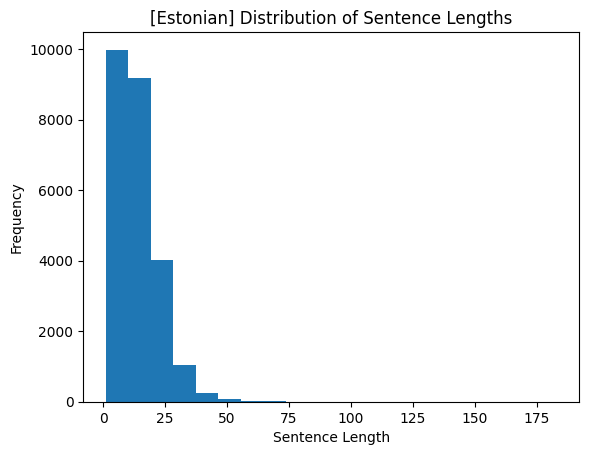

In [3]:
import matplotlib.pyplot as plt
print(et_train.sentences.head())
plt.hist(et_train.sentences['length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('[Estonian] Distribution of Sentence Lengths')
plt.show()

     sent_id                                           text  length
0    rw8td-8  sitä oltiin niin daideilijaa niin daideilijaa       6
1    wot6p-9                                     tule tänne       2
2  knd2t-121                         kyllä se tulee kotihin       4
3  nhuq4-122     me tulthin takaapäij ja vettä vaan niskaha       7
4  o8xuk-123            ei net tykähne olla näim pohjosessa       6


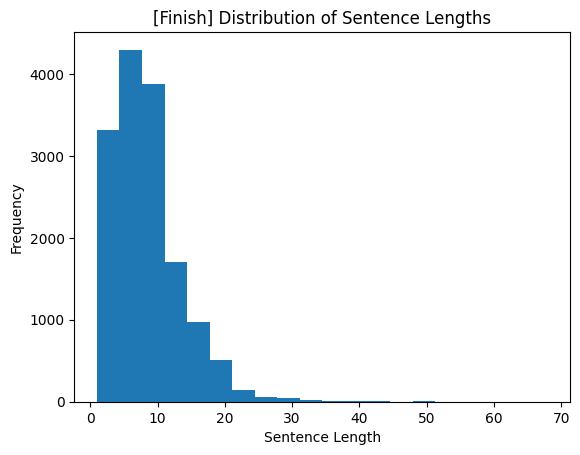

In [4]:
import matplotlib.pyplot as plt
print(fi_train.sentences.head())
plt.hist(fi_train.sentences['length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('[Finish] Distribution of Sentence Lengths')
plt.show()

                                             sent_id  \
0  weblog-juancole.com_juancole_20051126063000_EN...   
1  weblog-juancole.com_juancole_20051126063000_EN...   
2  weblog-juancole.com_juancole_20051126063000_EN...   
3  weblog-juancole.com_juancole_20051126063000_EN...   
4  weblog-juancole.com_juancole_20051126063000_EN...   

                                                text  length  
0  Al-Zaman : American forces killed Shaikh Abdul...      29  
1  [This killing of a respected cleric will be ca...      18  
2  DPA: Iraqi authorities announced that they had...      17  
3  Two of them were being run by 2 officials of t...      16  
4  The MoI in Iraq is equivalent to the US FBI, s...      36  


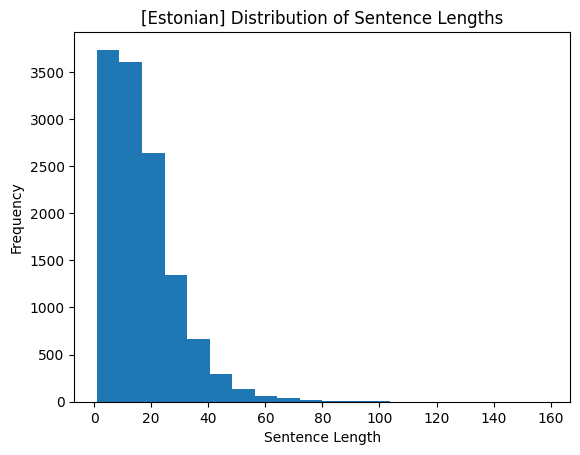

In [5]:
import matplotlib.pyplot as plt
print(en_train.sentences.head())
plt.hist(en_train.sentences['length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('[Estonian] Distribution of Sentence Lengths')
plt.show()

In [6]:
train_contradictions=fr_train.contradictions
train_sentences=fr_train.sentences
train_words=fr_train.words

In [7]:
train_sentences

,sent_id,text,length
0,fr-ud-train_00001,Les commotions cérébrales sont devenu si coura...,19
1,fr-ud-train_00002,L'œuvre est située dans la galerie des bataill...,17
2,fr-ud-train_00003,Le comportement de la Turquie vis-à-vis du pro...,34
3,fr-ud-train_00004,"Toutefois, les filles adorent les desserts.",8
4,fr-ud-train_00005,Ismene entre et annonce que c'est Farnace qui ...,18
...,...,...,...
14445,fr-ud-train_14550,"Le 28 mars 1792, ces territoires formèrent deu...",22
14446,fr-ud-train_14551,Ce débutant de l'année 1983 et double All-Star...,58
14447,fr-ud-train_14552,La population est alors indigène et fait parti...,25
14448,fr-ud-train_14553,"Mais MSI propose aussi, pour 699 euros, une ve...",25


In [8]:
fr_train.words

,sent_id,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
0,fr-ud-train_00001,1,Les,le,DET,_,Definite=Def|Number=Plur|PronType=Art,2,det,_,wordform=les
1,fr-ud-train_00001,2,commotions,commotion,NOUN,_,Gender=Fem|Number=Plur,5,nsubj,_,_
2,fr-ud-train_00001,3,cérébrales,cérébral,ADJ,_,Gender=Fem|Number=Plur,2,amod,_,_
3,fr-ud-train_00001,4,sont,être,AUX,_,Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbF...,5,aux:tense,_,_
4,fr-ud-train_00001,5,devenu,devenir,VERB,_,Gender=Masc|Number=Sing|Tense=Past|Typo=Yes|Ve...,0,root,_,CorrectForm=devenues|CorrectGender=Fem|Correct...
...,...,...,...,...,...,...,...,...,...,...,...
354562,fr-ud-train_14554,39,d',de,ADP,_,_,40,case,_,SpaceAfter=No
354563,fr-ud-train_14554,40,en,en,ADP,_,_,38,advmod,_,ExtPos=ADV|Idiom=Yes
354564,fr-ud-train_14554,41,haut,haut,NOUN,_,Gender=Masc|Number=Sing,40,fixed,_,InIdiom=Yes
354565,fr-ud-train_14554,42,»,»,PUNCT,_,_,34,punct,_,SpaceAfter=No


In [9]:
words_interest=train_words[['FORM','UPOS']]
words_interest.groupby('UPOS')
words_interest['UPOS'].value_counts(normalize=False)


UPOS
NOUN     66421
ADP      56473
DET      54144
PUNCT    39011
VERB     28185
PROPN    24750
ADJ      20981
PRON     16050
ADV      12443
AUX      11587
CCONJ     9301
NUM       9255
X         2680
SCONJ     2598
SYM        619
INTJ        69
Name: count, dtype: int64

In [10]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words

word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_words)  
# Training and evaluating
word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_words)  

predictions = word_distributed_classifier.predict(test_data)  

accuracy = word_distributed_classifier.evaluate(test_data)
print(accuracy)

0.8856714927608587


In [11]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words
stratifiedClassifier = StratifiedClassifier()
stratified_accuracy = stratifiedClassifier.evaluate(data)
print(f"Accuracy of StratifiedClassifier: {stratified_accuracy}")

Accuracy of StratifiedClassifier: {'accuracy': 0.11671418941977116}


In [6]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words
train_data=train_words
import pandas as pd
#Q1: ____________________________
naive_classifier = NaiveClassifier()
random_classifier = RandomClassifier()

naive_predictions = naive_classifier.predict(data)

naive_accuracy = naive_classifier.evaluate(data['UPOS'].tolist(), naive_predictions)
print(f"Accuracy of NaiveClassifier: {naive_accuracy}")

#Q2: For 10 differentt seeds, computing accuracy per each case : 
for seed in range(10):
    random_classifier = RandomClassifier(random_seed=seed)
    random_predictions = random_classifier.predict(data)
    random_accuracy = random_classifier.evaluate(data['UPOS'].tolist(), random_predictions)
    print(f"Accuracy of RandomClassifier with seed {seed}: {random_accuracy}")
    
# Q3: For POS distribution : 
stratifiedClassifier = StratifiedClassifier()
stratified_accuracy = stratifiedClassifier.evaluate(data)
print(f"Accuracy of StratifiedClassifier: {stratified_accuracy}")

# Q4: For mostCommon POS: 
mostCommonPOSClassifier = MostCommonPOSClassifier()
mostCommonPOSClassifier_accuracy = mostCommonPOSClassifier.evaluate(data)
print(f"Accuracy of MostCommonClassifier: {mostCommonPOSClassifier_accuracy}")

# Q5: 
word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_data)  
predictions = word_distributed_classifier.predict(test_data) 

accuracy =  word_distributed_classifier.evaluate(test_data)
print(accuracy)

Accuracy of NaiveClassifier: 0.6216004309481706
Accuracy of RandomClassifier with seed 0: 0.06279490195083016
Accuracy of RandomClassifier with seed 1: 0.06276669853652483
Accuracy of RandomClassifier with seed 2: 0.06123807348117563
Accuracy of RandomClassifier with seed 3: 0.062453640637735605
Accuracy of RandomClassifier with seed 4: 0.06364382472142077
Accuracy of RandomClassifier with seed 5: 0.062287240493334124
Accuracy of RandomClassifier with seed 6: 0.06234082698051426
Accuracy of RandomClassifier with seed 7: 0.06260311873355388
Accuracy of RandomClassifier with seed 8: 0.06235492868766693
Accuracy of RandomClassifier with seed 9: 0.061759836645824344
Accuracy of StratifiedClassifier: {'accuracy': 0.11563963933473786}
Accuracy of MostCommonClassifier: {'accuracy': 0.18732989815747095}
0.8875686470294558


## Feature is length:

In [13]:
import numpy as np

In [13]:
#Question 3 : train pos tagging on linear models 
## Perceptron

from sklearn.linear_model import Perceptron
train_words= fr_train.words
test_data=fr_test.words
data = train_words
test_words=fr_test.words



################################################################################################
####French#####
y_train_fr= fr_train.words['UPOS'].tolist()
x_train_fr= fr_train.words['FORM'].tolist() 
assert len(x_train_fr) == len(y_train_fr)

y_test_fr= fr_test.words['UPOS'].tolist()
x_test_fr= fr_test.words['FORM'].tolist()
assert len(x_test_fr) == len(y_test_fr)
################################################################################################
####englishh#####
x_train_en= en_train.words['UPOS'].tolist()
y_train_en= en_train.words['FORM'].tolist()
assert len(x_train_en) == len(y_train_en)

x_test_en= en_test.words['UPOS'].tolist()
y_test_en= en_test.words['FORM'].tolist()
################################################################################################
#----------------------------------------------------------------
## Length Feature Extraction
len_np = np.vectorize(len)

x_train_len_fr = len_np(x_train_fr).reshape(-1, 1)
x_test_len_fr = len_np(x_test_fr).reshape(-1, 1)

x_train_len_en= len_np(x_train_en).reshape(-1, 1)
x_test_len_en= len_np(x_test_en).reshape(-1, 1)

#----------------------------------------------------------------
pp = Perceptron().fit(x_train_len_fr,y_train_fr)
res_pred = pp.predict(x_test_len_fr)


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_fr, res_pred)
print(f"Accuracy of Perceptron on French test set using word length as feature: {accuracy:.4f}")


Accuracy of Perceptron on French test set using word length as feature: 0.2639


In [14]:
# Thsi code is dedidcated for Combining 2 word-features {len(word), len(neighbours)}
def neighbors_features(sentence, index):
    left_neighbor = len(sentence[index - 1]) if index > 0 else 0
    right_neighbor = len(sentence[index + 1]) if index < len(sentence) - 1 else 0
    return [left_neighbor, right_neighbor]

x_train_neighbors_fr = [neighbors_features(x_train_fr, i) for i in range(len(x_train_fr))]
x_test_neighbors_fr = [neighbors_features(x_test_fr, i) for i in range(len(x_test_fr))]

# Convert lists of lists to numpy arrays
x_train_neighbors_fr = np.array(x_train_neighbors_fr)
x_test_neighbors_fr = np.array(x_test_neighbors_fr)

# Combine with length feature
x_train_combined_fr = np.hstack((x_train_len_fr, x_train_neighbors_fr))
x_test_combined_fr = np.hstack((x_test_len_fr, x_test_neighbors_fr))

# Train the model 
pp_neighbors = Perceptron().fit(x_train_combined_fr, y_train_fr)
res_pred_neighbors = pp_neighbors.predict(x_test_combined_fr)
accuracy_neighbors = accuracy_score(y_test_fr, res_pred_neighbors)
print(f"Accuracy using word length and length of neighbors n-1 and n+1: {accuracy_neighbors*100:.4f}")

Accuracy using word length and length of neighbors n-1 and n+1: 29.4159


In [15]:
# We want to complexify our model by including other word based features :  {len(word), len(neighbours), suffix, prefix}

def naive_rules(word):
    word = word.lower()  
    if word.endswith(('tion', 'sion', 'ment')) or word in ['ville', 'année', 'pays', 'nom', 'jour', 'mois', 'homme', 'femme', 'vie', 'enfant']:
        return 'NOUN'
    if word.endswith(('er', 'ir', 're')) or word in ['être', 'avoir', 'est', 'était', 'été', 'fut', 'étant']:
        return 'VERB'
    if word in ['être', 'avoir', 'est', 'était', 'été', 'fut', 'étant']:
        return 'AUX'
    if word.endswith(('eux', 'euse')) or word in ['premier', 'première', 'français', 'française', 'nouveau', 'nouvelle', 'grand', 'grande', 'petit', 'petite']:
        return 'ADJ'
    if word.endswith('ment') or word in ['très', 'bien', 'aussi', 'toujours', 'surtout', 'encore', 'trop', 'jamais', 'vraiment']:
        return 'ADV'
    if word in ['le', 'la', 'les', 'l', 'un', 'une', 'des']:
        return 'DET'
    if word in ['il', 'elle', 'nous', 'vous', 'ils', 'elles', 'lui', 'on', 'je', 'me', 'ma', 'mon', 'leur', 'leurs']:
        return 'PRON'
    if word in ['et', 'ou', 'mais', 'donc']:
        return 'CCONJ'
    if word in ['que', 'quand', 'si', 'lorsque']:
        return 'SCONJ'
    if word in ['de', 'à', 'en', 'sur', 'avec', 'dans', 'par', 'pour', 'sans', 'sous', 'contre', 'après', 'avant', 'vers', 'chez']:
        return 'ADP'
    if word.isdigit() or word in ['un', 'deux', 'trois', 'deuxième', 'troisième']:
        return 'NUM'
    if word[0].isupper() and word not in ['et', 'ou', 'mais', 'donc']:
        return 'PROPN'
    if word in [',', '.', '(', ')', ':', ';', '«', '»', '!', '?']:
        return 'PUNCT'
    if word in ['%', '€']:
        return 'SYM'
    if word in ['oh', 'ah', 'eh']:
        return 'INTJ'
    return 'NOUN'

from sklearn.preprocessing import OneHotEncoder
POS_LABEL = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']

# 1. Feature Encoding
encoder = OneHotEncoder(sparse=False)
# Fit the encoder on all possible POS tags
encoder.fit(np.array(POS_LABEL).reshape(-1, 1))

# 2. Feature Extraction
def get_grammatical_feature(word):
    pos_tag = naive_rules(word)
    encoded_tag = encoder.transform([[pos_tag]])
    return encoded_tag[0]

# Apply the function to your dataset
x_train_grammatical_fr = np.array([get_grammatical_feature(word) for word in x_train_fr])
x_test_grammatical_fr = np.array([get_grammatical_feature(word) for word in x_test_fr])


# 3. Combine Features
x_train_combined_fr = np.hstack((x_train_len_fr, x_train_grammatical_fr, x_train_neighbors_fr))  
x_test_combined_fr = np.hstack((x_test_len_fr, x_test_grammatical_fr, x_test_neighbors_fr))

# 4. Train the Perceptron
pp = Perceptron().fit(x_train_combined_fr, y_train_fr)
res_pred = pp.predict(x_test_combined_fr)
accuracy = accuracy_score(y_test_fr, res_pred)
print(f"Accuracy of word features based : {accuracy:.4f}")

/Users/yasser_dotcom/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy of word features based : 0.5663


In [17]:
len_np = np.vectorize(len)
X_train_len = len_np(train_data['FORM'].values).reshape(-1, 1)
X_test_len = len_np(test_data['FORM'].values).reshape(-1, 1)
def encode_grammatical_feature(word):
    pos_tag = naive_rules(word)
    encoded_tag = encoder.transform([[pos_tag]])
    return encoded_tag[0]

X_train_grammatical = np.array([encode_grammatical_feature(word) for word in train_data['FORM'].values])
X_test_grammatical = np.array([encode_grammatical_feature(word) for word in test_data['FORM'].values])
X_train_combined = np.hstack((X_train_len, X_train_grammatical))
X_test_combined = np.hstack((X_test_len, X_test_grammatical))
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_combined)
X_test_pca = pca.transform(X_test_combined)
def get_context_features(dataset):
    context_features = []
    words = dataset['FORM'].values
    for i, word in enumerate(words):
        before = words[max(0, i - 2):i]
        after = words[i + 1:i + 3]
        
        before_features = [encode_grammatical_feature(w) for w in before]
        after_features = [encode_grammatical_feature(w) for w in after]
        
        while len(before_features) < 2:
            before_features.insert(0, np.zeros(len(POS_LABEL)))
        while len(after_features) < 2:
            after_features.append(np.zeros(len(POS_LABEL)))
        
        combined_features = np.hstack((before_features, after_features)).flatten()
        context_features.append(combined_features)
    return np.array(context_features)

X_train_context = get_context_features(train_data)
X_test_context = get_context_features(test_data)
X_train_final = np.hstack((X_train_pca, X_train_context))
X_test_final = np.hstack((X_test_pca, X_test_context))
y_train = train_data['UPOS'].values
y_test = test_data['UPOS'].values

pp = Perceptron().fit(X_train_final, y_train)
res_pred = pp.predict(X_test_final)
accuracy = accuracy_score(y_test, res_pred)
print(f"Final Accuracy: {accuracy:.4f}")


In [12]:
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

X_train = train_data['FORM'].values
y_train = train_data['UPOS'].values
X_test = test_data['FORM'].values
y_test = test_data['UPOS'].values

# Length of the Word as a Basic Feature
len_np = np.vectorize(len)
X_train_len = len_np(X_train).reshape(-1, 1)
X_test_len = len_np(X_test).reshape(-1, 1)



# Define the simple_feature_french_language function
def simple_feature_french_language(word):
    tag = "NOUN"
    if word.endswith("s"):
        tag = "NOUN"
    elif word.endswith("ment"):
        tag = "ADV"
    elif word.endswith("er"):
        tag = "VERB"
    elif word.endswith("e"):
        tag = "NOUN"
    if word.startswith("dé"):
        tag = "VERB"
    elif word.startswith("pré"):
        tag = "NOUN"
    elif word.startswith("sous"):
        tag = "ADP"
    if word.endswith("ion"):
        tag = "NOUN"
    elif word.endswith("ier"):
        tag = "NOUN"
    elif word.endswith("ité"):
        tag = "NOUN"
    if word == "est":
        tag = "VERB"
    elif word == "et":
        tag = "CCONJ"
    elif word == "de":
        tag = "ADP"
    elif 47 < ord(word[0]) < 58:
        tag = "NUM"
    return tag


X_train_grammatical = np.array([simple_feature_french_language(word) for word in X_train]).reshape(-1, 1)
X_test_grammatical = np.array([simple_feature_french_language(word) for word in X_test]).reshape(-1, 1)
# Neighbor Features
def neighbor_feature(word_list):
    tag = "NOUN"
    word = word_list[1][0]
    left_word = word_list[0][0]
    right_word = word_list[2][0]
    right_tag = word_list[2][1]
    left_tag = word_list[0][1]
    
    if left_word == word and right_tag in ['ADJ', 'NOUN']:
        tag = 'DET'
    if left_tag == "DET" and right_tag == "ADJ":
        tag = "NOUN"
    elif left_tag == "DET" and right_tag == "VERB":
        tag = "NOUN"
    elif left_tag == "DET" and right_tag == "NOUN":
        tag = "ADJ"
    elif left_tag == "DET":
        tag = "NOUN"
    elif word.endswith("ment") and right_word in ["de", "à"]:
        tag = "ADV"
    elif right_word == "NOUN":
        tag = "DET"
    elif 47 < ord(left_word[0]) < 58:
        tag = "NOUN"
    return tag





# Constructing word lists for neighbor feature extraction
train_word_lists = []
for i in range(len(X_train)):
    if i == 0:
        train_word_lists.append([(X_train[i], y_train[i]), (X_train[i], y_train[i]), (X_train[i+1], y_train[i+1])])
    elif i == len(X_train) - 1:
        train_word_lists.append([(X_train[i-1], y_train[i-1]), (X_train[i], y_train[i]), (X_train[i], y_train[i])])
    else:
        train_word_lists.append([(X_train[i-1], y_train[i-1]), (X_train[i], y_train[i]), (X_train[i+1], y_train[i+1])])

test_word_lists = []
for i in range(len(X_test)):
    if i == 0:
        test_word_lists.append([(X_test[i], y_test[i]), (X_test[i], y_test[i]), (X_test[i+1], y_test[i+1])])
    elif i == len(X_test) - 1:
        test_word_lists.append([(X_test[i-1], y_test[i-1]), (X_test[i], y_test[i]), (X_test[i], y_test[i])])
    else:
        test_word_lists.append([(X_test[i-1], y_test[i-1]), (X_test[i], y_test[i]), (X_test[i+1], y_test[i+1])])

from sklearn.preprocessing import OneHotEncoder

# Combine training and testing data for encoding
combined_grammatical = np.vstack((X_train_grammatical, X_test_grammatical))
combined_neighbors = np.vstack((X_train_neighbors, X_test_neighbors))

# One-hot encode the combined data
encoder_grammatical = OneHotEncoder(sparse=False).fit(combined_grammatical)
encoded_grammatical = encoder_grammatical.transform(combined_grammatical)

encoder_neighbors = OneHotEncoder(sparse=False).fit(combined_neighbors)
encoded_neighbors = encoder_neighbors.transform(combined_neighbors)

# Split the encoded data back into training and testing sets
X_train_grammatical_encoded = encoded_grammatical[:len(X_train)]
X_test_grammatical_encoded = encoded_grammatical[len(X_train):]

X_train_neighbors_encoded = encoded_neighbors[:len(X_train)]
X_test_neighbors_encoded = encoded_neighbors[len(X_train):]

# Combine the features
X_train_combined = np.hstack((X_train_len, X_train_grammatical_encoded, X_train_neighbors_encoded))
X_test_combined = np.hstack((X_test_len, X_test_grammatical_encoded, X_test_neighbors_encoded))



# PCA for Dimensionality Reduction
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_combined)
X_test_pca = pca.transform(X_test_combined)
# Training the Perceptron and Evaluating
pp = Perceptron().fit(X_train_pca, y_train)
res_pred = pp.predict(X_test_pca)
accuracy = accuracy_score(y_test, res_pred)
print(f"Accuracy: {accuracy:.4f}")

/Users/yasser_dotcom/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/yasser_dotcom/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.1849


# English


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

train_words= en_train.words
test_data=en_test.words
data = train_words
test_words=en_test.words
train_contradictions=en_train.contradictions
train_sentences=en_train.sentences
train_words=en_train.words

train_words= en_train.words
test_data=en_test.words
data = train_words
train_data=train_words

X_train = train_data['FORM'].values
y_train = train_data['UPOS'].values
X_test = test_data['FORM'].values
y_test = test_data['UPOS'].values

# Length of the Word as a Basic Feature
len_np = np.vectorize(len)
X_train_len = len_np(X_train).reshape(-1, 1)
X_test_len = len_np(X_test).reshape(-1, 1)



# Define the simple_feature_french_language function
def simple_feature_french_language(word):
    tag = "NOUN"
    if word.endswith("s"):
        tag = "NOUN"
    elif word.endswith("ment"):
        tag = "ADV"
    elif word.endswith("er"):
        tag = "VERB"
    elif word.endswith("e"):
        tag = "NOUN"
    if word.startswith("dé"):
        tag = "VERB"
    elif word.startswith("pré"):
        tag = "NOUN"
    elif word.startswith("sous"):
        tag = "ADP"
    if word.endswith("ion"):
        tag = "NOUN"
    elif word.endswith("ier"):
        tag = "NOUN"
    elif word.endswith("ité"):
        tag = "NOUN"
    if word == "est":
        tag = "VERB"
    elif word == "et":
        tag = "CCONJ"
    elif word == "de":
        tag = "ADP"
    elif 47 < ord(word[0]) < 58:
        tag = "NUM"
    return tag


X_train_grammatical = np.array([simple_feature_french_language(word) for word in X_train]).reshape(-1, 1)
X_test_grammatical = np.array([simple_feature_french_language(word) for word in X_test]).reshape(-1, 1)
# Neighbor Features
def neighbor_feature(word_list):
    tag = "NOUN"
    word = word_list[1][0]
    left_word = word_list[0][0]
    right_word = word_list[2][0]
    right_tag = word_list[2][1]
    left_tag = word_list[0][1]
    
    if left_word == word and right_tag in ['ADJ', 'NOUN']:
        tag = 'DET'
    if left_tag == "DET" and right_tag == "ADJ":
        tag = "NOUN"
    elif left_tag == "DET" and right_tag == "VERB":
        tag = "NOUN"
    elif left_tag == "DET" and right_tag == "NOUN":
        tag = "ADJ"
    elif left_tag == "DET":
        tag = "NOUN"
    elif word.endswith("ment") and right_word in ["de", "à"]:
        tag = "ADV"
    elif right_word == "NOUN":
        tag = "DET"
    elif 47 < ord(left_word[0]) < 58:
        tag = "NOUN"
    return tag





# Constructing word lists for neighbor feature extraction
train_word_lists = []
for i in range(len(X_train)):
    if i == 0:
        train_word_lists.append([(X_train[i], y_train[i]), (X_train[i], y_train[i]), (X_train[i+1], y_train[i+1])])
    elif i == len(X_train) - 1:
        train_word_lists.append([(X_train[i-1], y_train[i-1]), (X_train[i], y_train[i]), (X_train[i], y_train[i])])
    else:
        train_word_lists.append([(X_train[i-1], y_train[i-1]), (X_train[i], y_train[i]), (X_train[i+1], y_train[i+1])])

test_word_lists = []
for i in range(len(X_test)):
    if i == 0:
        test_word_lists.append([(X_test[i], y_test[i]), (X_test[i], y_test[i]), (X_test[i+1], y_test[i+1])])
    elif i == len(X_test) - 1:
        test_word_lists.append([(X_test[i-1], y_test[i-1]), (X_test[i], y_test[i]), (X_test[i], y_test[i])])
    else:
        test_word_lists.append([(X_test[i-1], y_test[i-1]), (X_test[i], y_test[i]), (X_test[i+1], y_test[i+1])])

from sklearn.preprocessing import OneHotEncoder

# Combine training and testing data for encoding
combined_grammatical = np.vstack((X_train_grammatical, X_test_grammatical))
combined_neighbors = np.vstack((X_train_neighbors, X_test_neighbors))

# One-hot encode the combined data
encoder_grammatical = OneHotEncoder(sparse=False).fit(combined_grammatical)
encoded_grammatical = encoder_grammatical.transform(combined_grammatical)

encoder_neighbors = OneHotEncoder(sparse=False).fit(combined_neighbors)
encoded_neighbors = encoder_neighbors.transform(combined_neighbors)

# Split the encoded data back into training and testing sets
X_train_grammatical_encoded = encoded_grammatical[:len(X_train)]
X_test_grammatical_encoded = encoded_grammatical[len(X_train):]

X_train_neighbors_encoded = encoded_neighbors[:len(X_train)]
X_test_neighbors_encoded = encoded_neighbors[len(X_train):]

# Combine the features
X_train_combined = np.hstack((X_train_len, X_train_grammatical_encoded, X_train_neighbors_encoded))
X_test_combined = np.hstack((X_test_len, X_test_grammatical_encoded, X_test_neighbors_encoded))



# PCA for Dimensionality Reduction
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_combined)
X_test_pca = pca.transform(X_test_combined)
# Training the Perceptron and Evaluating
pp = Perceptron().fit(X_train_pca, y_train)
res_pred = pp.predict(X_test_pca)
accuracy = accuracy_score(y_test, res_pred)
print(f"Accuracy: {accuracy:.4f}")